['delhi', (28.632821, 77.219459), 'drive_service']


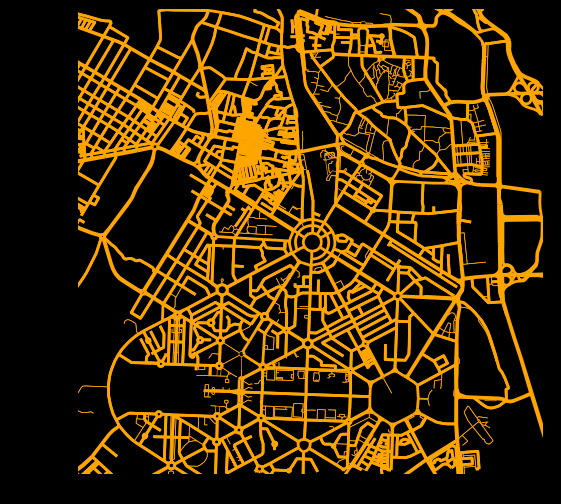

['mumbai', (18.932018, 72.834971), 'drive_service']


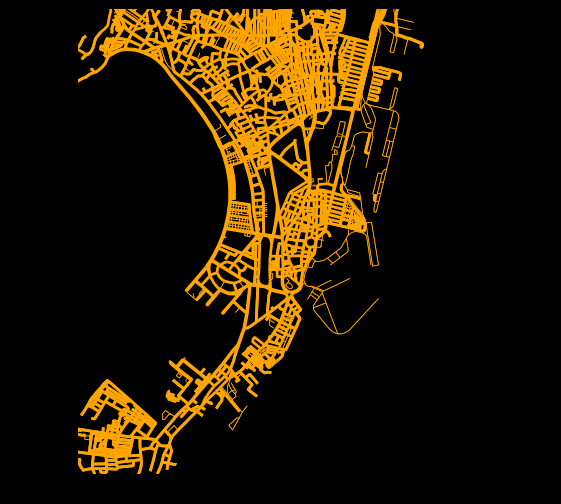

['kolkatta', (22.566929, 88.34726), 'drive_service']


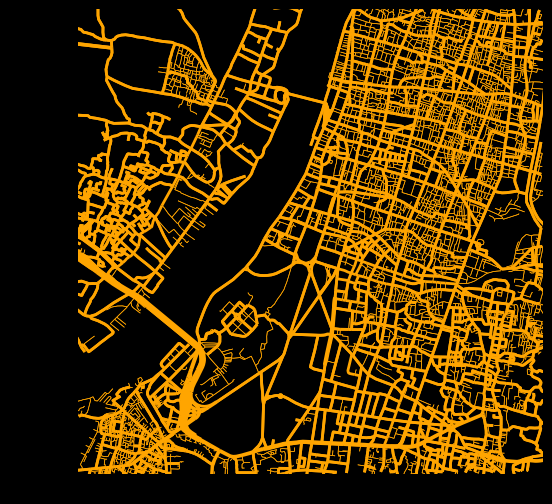

['chennai', (13.080271, 80.284657), 'drive_service']


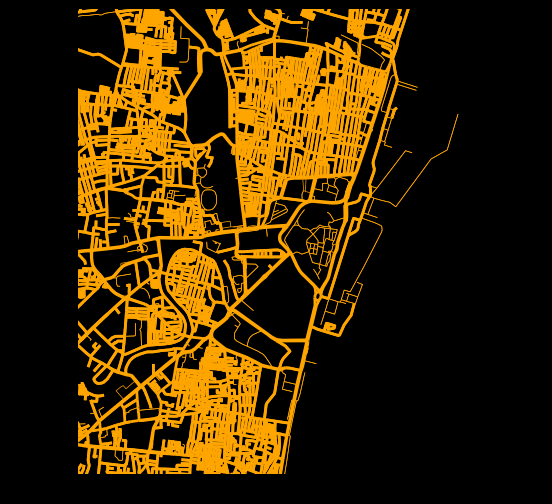

['bengaluru', (12.97783, 77.593817), 'drive_service']


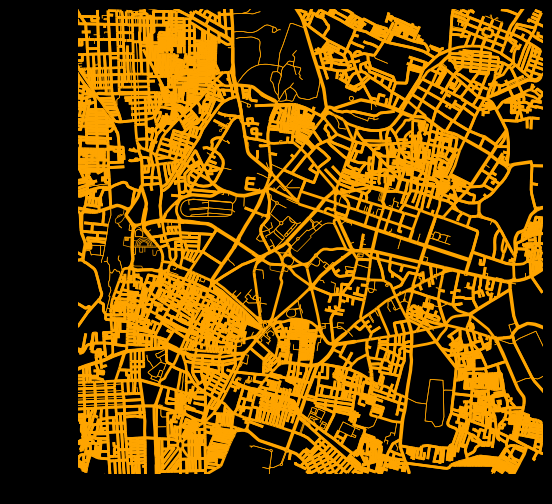

['hyderabad', (17.366103, 78.469492), 'drive_service']


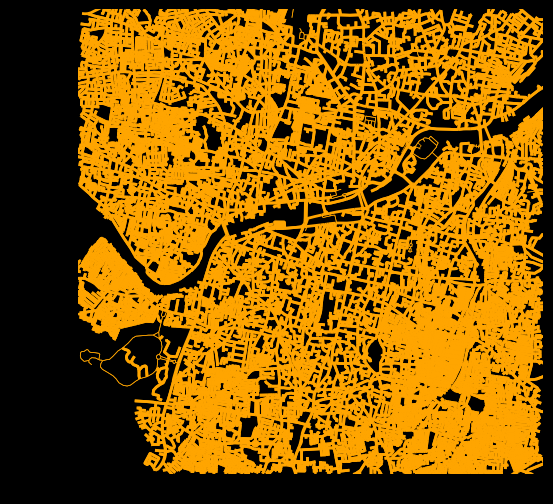

['ahmedabad', (23.026948, 72.574903), 'drive_service']


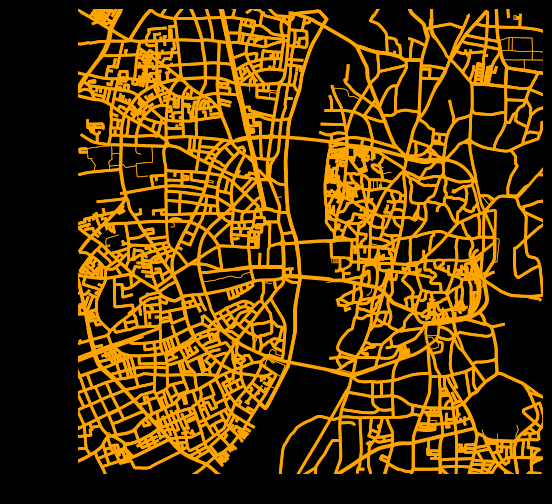

['jaipur', (26.90729, 75.805467), 'drive_service']


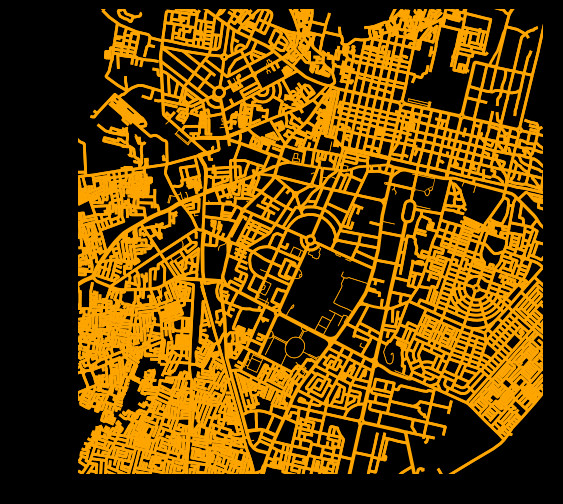

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline  
ox.config(log_console=True)

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459), 'drive_service'], 
    ['mumbai', (18.932018, 72.834971), 'drive_service'], 
    ['kolkatta', (22.566929, 88.347260), 'drive_service'], 
    ['chennai', (13.080271, 80.284657), 'drive_service'], 
    ['bengaluru', (12.977830, 77.593817), 'drive_service'], 
    ['hyderabad', (17.366103, 78.469492), 'drive_service'], 
    ['ahmedabad', (23.026948, 72.574903), 'drive_service'], 
    ['jaipur', (26.907290, 75.805467), 'drive_service'], 
]

for plot_num, place in enumerate(places):
    print(place)
    name, point, nt = place
    G = ox.graph_from_point(point, distance=dist, distance_type='bbox', network_type=nt, truncate_by_edge=True)
    G = ox.project_graph(G)
    
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        footway, motorway, other = 0.5, 4, 2
        if name=="hyderabad":
            footway, motorway, other = 0.1, 3, 0.9
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 0.5
        elif data['highway'] in ['motorway']:
            width = 4
        else:
            width = 2
        ew.append(width)

    bbox_proj = ox.bbox_from_point(point, dist, project_utm=True)
    
    _, _ = ox.plot_graph(G, bbox=bbox_proj, 
                  margin=0, node_size=0, edge_linewidth=ew, edge_color='orange', bgcolor='#000000',
                  show=True)
    
    # save to file instead    
#     ox.plot_graph(G, bbox=bbox_proj, 
#                   margin=0, node_size=0, edge_linewidth=ew, edge_color='orange', bgcolor='#000000',
#                   show=False, save=True, filename="02_{}".format(name), file_format="png")

References
=======

- https://github.com/gboeing/osmnx
- http://geoffboeing.com/2017/01/square-mile-street-network-visualization/